麻烦老师了，第一部分是课程代码复现，第二部分是作业代码

#第一部分：课程代码输入

In [3]:
simple_grammar = '''
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun  => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
'''

In [4]:
import random

In [5]:
def adj():
    return random.choice("蓝色的 | 好看的 | 小小的".split('|')).split()[0]

In [6]:
def adj_star():
    return random.choice([None,adj() + adj()])

In [7]:
adj_star()

In [8]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj => 蓝色的 | 好看的 | 小小的"""

In [9]:
grammar = {}      #{"adj",[]}

for line in adj_grammar.split('\n'):
	if not line.strip(): continue
	
	exp, stmt = line.split('=>')
	grammar[exp] = stmt.split('|')
	#grammar[exp.strip()] = [s.split() for s in stmt.split('|')]

In [10]:
grammar

{'Adj* ': [' null ', ' Adj Adj*'], 'Adj ': [' 蓝色的 ', ' 好看的 ', ' 小小的']}

In [11]:
grammar['Adj* ']

[' null ', ' Adj Adj*']

In [12]:
grammar = {}      #{"adj",[]}

for line in adj_grammar.split('\n'):
	if not line.strip(): continue
	
	exp, stmt = line.split('=>')
	#grammar[exp] = stmt.split('|')
	grammar[exp.strip()] = [s.split() for s in stmt.split('|')]

In [13]:
grammar

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [18]:
def generate(gram,target):
    if target in gram:  # targat could expanded        
        new_expanded = random.choice(gram[target])
        return ''.join(generate(gram,t) for t in new_expanded)
    else:	
        return target 


In [15]:
generate(gram = grammar, target = 'Adj*')

'小小的好看的null'

优化版

In [16]:
choice = random.choice
def generate(gram,target):
	if target not in gram: return target # targat is a terminal 
	expand = [generate(gram,t) for t in choice(gram[target])]   #过滤null
	return ''.join([e if e != '/n' else '\n'  for e in expand if e != 'null'])          #合并可能的进一步扩展结果

In [22]:
generate(gram = grammar, target = 'Adj*')

'好看的蓝色的小小的小小的null'

语法抽象化

In [273]:
def create_grammar(grammar_str, split = '=>'):
	grammar = {}
	for line in grammar_str.split('\n'):
		if not line.strip(): continue
		exp, stmt = line.split(split)
		grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
	return grammar

In [274]:
example_grammar = create_grammar(simple_grammar)

In [275]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [276]:
generate(gram = example_grammar, target = 'sentence')

'这个小猫看见这个小猫'

In [337]:
# 在西部世界里，一个‘人类’的语言可以定义为
human = '''
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
'''
host = '''
host = 寒暄 报数 询问 业务相关 结尾
报数 = 我是 数字 号
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ，
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
'''

In [338]:
generate(gram = create_grammar(host, split = '='), target = 'host')

'女士，你好我是4号您需要打牌吗？'

In [279]:
generate(gram = create_grammar(human, split = '='), target = 'human')

'我们找找玩的'

Data Driven
我们的目标是，希望做一个程序，当输入的数据（语法）变化时，我们的程序不用重新写——Generalization（通用模型）
AI？ 如何能自动化解决问题，我们找到一个方法后，输入变了，但方法可以不用变

In [280]:
Programming = '''
stmt => if_exp | while_exp | assignment
assignment => var = var
if_exp => if ( var ) /n { stmt }
while_exp => while ( var ) /n { stmt }
var => chars number
chars => char | char char
char => a | b | c | d | e
number => 1 | 2 | 3
'''

In [281]:
print(generate(gram = create_grammar(Programming, split = '=>'), target = 'stmt'))

while(d1)
{c2=e3}


In [282]:
Programming_after = '''
stmt => if_exp | while_exp | assignment
assignment => var = var
if_exp => if ( var )  { /n ....stmt }
while_exp => while ( var )  { /n - - - stmt }
var => chars number
chars => char | char char
char => a | b | c | d | e
number => 1 | 2 | 3
'''

In [283]:
print(generate(gram = create_grammar(Programming_after, split = '=>'), target = 'stmt'))

while(e1){
---if(b1){
....stmt}}


Language Model

$$ language\_model(String) = Probability(String) \in [0,1]$$

$$ Pr(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_4) * Pr(w_2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4) $$

How to get $ Pr(w_1 | w_2 w_3 w_4) $ ?

w1、w2、w3、w4同时出现的概率，除以 w2、w3、w4同时出现的概率，

简化
极简版（出现的概率只和自身相关）
$ Pr(w_1 w_2 w_3 w_4) \sim Pr(w_1) * Pr(w_2 ) * Pr(w_3) * Pr(w_4) $

判断一句话出不出现，只需要判断这个词组出不出现，然后算出这个词组的概率即可
$$ Pr(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * Pr(w_2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4) $$

In [284]:
import random

In [285]:
random.choice(range(100))

3

In [286]:
filename =  '/Users\Lee\Downloads\sqlResult_1558435.csv'

In [287]:
import pandas as pd

In [288]:
content = pd.read_csv(filename,encoding = 'gb18030')

In [289]:
content.head

<bound method NDFrame.head of           id            author                    source  \
0      89617               NaN    快科技@http://www.kkj.cn/   
1      89616               NaN    快科技@http://www.kkj.cn/   
2      89615               NaN    快科技@http://www.kkj.cn/   
3      89614               NaN                       新华社   
4      89613        胡淑丽_MN7479                     深圳大件事   
5      89612                张怡                 中国证券报?中证网   
6      89611               NaN  威锋网@http://www.feng.com/   
7      89610            申玉彬 整理                 中国证券报?中证网   
8      89609        李杭_BJS4645                 荆楚网-楚天都市报   
9      89608                吴瞬                 中国证券报?中证网   
10     89607               NaN                     证券时报网   
11     89606               NaN                     证券时报网   
12     89605               NaN                     中国新闻网   
13     89604            申玉彬 整理                 中国证券报?中证网   
14     89603               NaN                      国际在线   
15     896

In [290]:
articles = content['content'].tolist()

In [291]:
articles[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [292]:
len(articles)

89611

In [293]:
articles[100]

nan

In [294]:
articles[110]

'在外国名著《麦田里的守望者》中，作者想要守护麦田里如自己内心一般纯真的孩子们。而驻村干部们，也在这个炎热的夏天里撸袖子上阵，真正做起了村民们的“麦田守望者”。\r\n三夏时节不等人\r\n你看到了吗？不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，那若隐若现的人影，是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。\r\n在这个炎热的夏季，他们深入田间地头，帮助村民们收割小麦。扛起收麦机，麦田中的每个人都显得兴致勃勃，一天下来就近22亩小麦收割完毕。\r\n志愿者麦麦提亚森擦去满脸的汗水，高兴地告诉驻村队员：“我们青年志愿者应该多做贡献，为村里的脱贫致富出把力。工作队带着我们为村里的老人服务，看到那些像我爷爷奶奶一样的老人赞许感谢的目光，我体会到了帮助他人的快乐。”（自治区新闻出版广电局驻村工作队孙敏 艾力依布拉音）\r\n麦收时节 我们在一起\r\n6月中旬的和田墨玉，麦田金黄，静待收割。\r\n6月14日、15日两天，自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，帮助村里29户有需要的村民进行小麦收割工作。\r\n田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。10余台割麦机一起轰鸣，男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。\r\n休息空闲，工作队员和村民们坐在树荫下、田埂上，互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。（自治区高级人民法院驻村工作队周春梅 艾地艾木·阿不拉）\r\n细看稻菽千重浪\r\n6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，见到了自己的亲戚。现场处处都透出掩盖不住的喜悦，一声声亲切的“谢谢”、一个个结实的拥抱，都透露出浓浓的亲情。\r\n没坐一会儿，在嘘寒问暖中大家了解到在麦收的关键时刻，部分村民家中却存在收割难的问题。小麦成熟期短，收获的时间集中，天气的变化对小麦最终产量的影响极大，如果不能及时收割，会有不小损失的。于是，大家几乎立刻就决定要帮助亲戚们收割麦子。\r\n在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，挥舞着镰刀进行着无

invalid 无用字符


In [295]:
import re

In [296]:
def token(string):
    return re.findall( '\w+', string)

In [117]:
''.join(token(articles[100]))

'wtf我为啥要看这个'

In [298]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [299]:
len(articles_clean)

89611

In [300]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [301]:
ls

 驱动器 C 中的卷是 系统
 卷的序列号是 843A-F5DF

 C:\Users\Lee 的目录

2019/07/06  02:51    <DIR>          .
2019/07/06  02:51    <DIR>          ..
2019/07/03  20:32    <DIR>          .anaconda
2019/07/06  02:52    <DIR>          .conda
2019/07/06  00:50                43 .condarc
2019/07/04  23:08    <DIR>          .idlerc
2019/07/03  23:43    <DIR>          .ipynb_checkpoints
2019/07/03  20:34    <DIR>          .ipython
2019/07/04  20:49    <DIR>          .jupyter
2019/07/06  01:39    <DIR>          .matplotlib
2019/07/05  14:06    <DIR>          .PyCharm2019.1
2019/07/06  02:52        64,368,892 article_9k.txt
2019/07/01  22:00    <DIR>          Contacts
2019/07/06  02:04    <DIR>          Desktop
2019/07/03  16:46    <DIR>          Documents
2019/07/05  18:23    <DIR>          Downloads
2019/07/01  22:02    <DIR>          Favorites
2019/07/06  02:51           154,234 Lesson-01.ipynb
2019/07/01  22:00    <DIR>          Links
2019/07/01  22:00    <DIR>          Music
2019/07/01  22:02    <DIR>        

In [302]:
articles_clean[0]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [303]:
import jieba

In [304]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [305]:
def cut(string): return list(jieba.cut(string))

In [306]:
TOKEN = []

In [307]:
for i, line in enumerate(open('article_9k.txt')):
    if i % 100 ==0: print(i)
    
    if i > 10000: break
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [308]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [309]:
len(TOKEN)

3693856

In [310]:
TOKEN

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '\n',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一

In [311]:
#  TOKENS = cut(open('article_9k.txt').read())

In [312]:
from collections import Counter

In [313]:
# words_count = Counter(TOKENS)
words_count = Counter(TOKEN)

In [314]:
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

In [315]:
frequiences = [f for w, f in words_count.most_common(100)]

In [316]:
x = [i for i in range(100)]

In [317]:
%matplotlib inline

In [318]:
import matplotlib.pyplot as plt

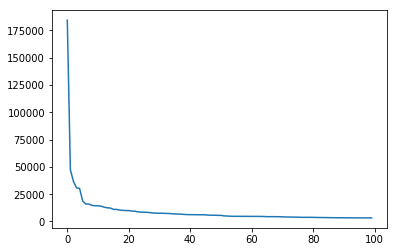

In [319]:
plt.plot(x, frequiences)

In [320]:
import numpy as np

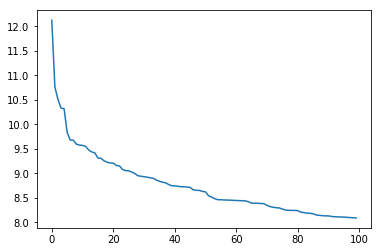

In [321]:
plt.plot(x, np.log(frequiences))

In [322]:
# articles_words = [
      cut(string) for string in articles_clean
]

IndentationError: unexpected indent (<ipython-input-322-5a98b9398fd7>, line 2)

$一元、二元语言模型$

In [323]:
def prob_1(word):
    return words_count[word]/len(TOKEN)

In [324]:
prob_1('我们')

0.001554473157589251

In [325]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [326]:
TOKEN = [str(t) for t in TOKEN]

In [327]:
TOKEN_2_GRAM = [ ''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2])) ]

In [328]:
TOKEN_2_GRAM

['此外自',
 '自本周',
 '本周6',
 '6月',
 '月12',
 '12日起',
 '日起除',
 '除小米',
 '小米手机',
 '手机6',
 '6等',
 '等15',
 '15款',
 '款机型',
 '机型外',
 '外其余',
 '其余机型',
 '机型已',
 '已暂停',
 '暂停更新',
 '更新发布',
 '发布含',
 '含开发',
 '开发版',
 '版体验版',
 '体验版内测',
 '内测稳定版',
 '稳定版暂不受',
 '暂不受影响',
 '影响以',
 '以确保',
 '确保工程师',
 '工程师可以',
 '可以集中',
 '集中全部',
 '全部精力',
 '精力进行',
 '进行系统优化',
 '系统优化工作',
 '工作有人',
 '有人猜测',
 '猜测这',
 '这也',
 '也是',
 '是将',
 '将精力',
 '精力主要',
 '主要用到',
 '用到MIUI9',
 'MIUI9的',
 '的研发',
 '研发之中',
 '之中MIUI8',
 'MIUI8去年',
 '去年5',
 '5月',
 '月发布',
 '发布距今已有',
 '距今已有一年',
 '一年有余',
 '有余也',
 '也是',
 '是时候',
 '时候更新换代',
 '更新换代了',
 '了当然',
 '当然关于',
 '关于MIUI9',
 'MIUI9的',
 '的确切',
 '确切信息',
 '信息我们',
 '我们还是',
 '还是等待',
 '等待官方消息',
 '官方消息\n',
 '\n骁龙',
 '骁龙835',
 '835作为',
 '作为唯一',
 '唯一通过',
 '通过Windows10',
 'Windows10桌面',
 '桌面平台',
 '平台认证',
 '认证的',
 '的ARM',
 'ARM处理器',
 '处理器高通',
 '高通强调',
 '强调不会',
 '不会因为',
 '因为只',
 '只考虑',
 '考虑性能',
 '性能而',
 '而去',
 '去屏蔽掉',
 '屏蔽掉小',
 '小核心',
 '核心相反',
 '相反他们',
 '他们正',
 '正联手',
 '联手微软',
 '微软找到',
 '找到一种',
 '一种适合',
 '适合桌面',
 '桌面平台',
 '平台

In [329]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [330]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1 + word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [331]:
prbo_2('去','吃饭')

2.707199580708929e-07

In [332]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i ,word in enumerate(words[:-1]):
        next_ = words[i + 1]
        probablity = prob_2(word,next_)
        sentence_pro *= probablity
    return sentence_pro

In [333]:
get_probablity('小明今天抽奖抽到一台苹果手机')

6.298565169317442e-39

In [334]:
get_probablity('洋葱奶昔来一杯')

1.9840875058382383e-20

In [335]:
get_probablity('养乐多绿来一杯')

7.3289295697906e-14

In [344]:
for sen in [generate(gram=example_grammar, target = 'sentence') for i in range(10)]:
    print('sentence:{} with Prb:{}'.format(sen, get_probablity(sen)) )

sentence:这个蓝色的桌子坐在这个篮球 with Prb:1.2597130338634884e-38
sentence:这个小小的好看的小小的女人看着一个蓝色的蓝色的好看的女人 with Prb:2.805691165709873e-86
sentence:一个小小的篮球看见一个小猫 with Prb:1.7449485108707935e-32
sentence:一个女人坐在一个小小的蓝色的小小的女人 with Prb:5.539408861999648e-51
sentence:一个蓝色的好看的蓝色的桌子坐在一个篮球 with Prb:6.549800568469586e-62
sentence:一个小猫听着这个篮球 with Prb:1.2214639576095555e-31
sentence:一个好看的小小的桌子看见一个小猫 with Prb:2.344577535498556e-45
sentence:这个蓝色的好看的好看的小小的蓝色的女人听着一个好看的小小的女人 with Prb:1.5364193532466884e-103
sentence:一个小小的小小的小小的小小的篮球看见一个桌子 with Prb:3.462130538749781e-52
sentence:这个小猫坐在一个桌子 with Prb:5.371320863895103e-27


In [349]:
need_compared = ["今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",'真是一只好看的小猫 真事一只好看的小猫','洋葱奶昔来一杯 养乐多绿来一杯']


In [351]:
for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = get_probablity(s1),get_probablity(s2)
    better = s1 if p1 > p2 else s2
    print ('{} is more possibile'.format(better))
    print('-'*4 + '{} is probility {}'.format(s1,p1))
    print('-'*4 + '{} is probility {}'.format(s2,p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possibile
----今天晚上请你吃大餐，我们一起吃日料 is probility 1.7051133711305114e-62
----明天晚上请你吃大餐，我们一起吃苹果 is probility 1.7051133711305114e-62
真是一只好看的小猫 is more possibile
----真是一只好看的小猫 is probility 5.908452950284614e-26
----真事一只好看的小猫 is probility 1.599536134964894e-32
养乐多绿来一杯 is more possibile
----洋葱奶昔来一杯 is probility 1.9840875058382383e-20
----养乐多绿来一杯 is probility 7.3289295697906e-14


In [112]:
TOKENS = []

In [113]:
from functools import reduce

In [114]:
from operator import add, mul

In [116]:
reduce(add, [1,2,3,4,5])

15

In [ ]:
# TOKENS = reduce(add, articles_words)

第二部分 ：

！！！！！！！！！课后作业代码！！！！！！！！！！！！！！！课后作业代码！！！！！！！！！！！！！！！

In [23]:
#programming1

In [26]:
import random
choice = random.choice
#在动物世界里，一只狮子的语言可以定义为
lion = """
lion = 自己 感觉 动作 标点
自己 = 我 | 大爷 | 幼仔子们 
感觉 = 困了 | 饿了
动作 = 要捕食 | 想睡觉 
标点 = ！ | 。
"""

#一只蚂蚁的语言可以定义为

ant = """
ant = 感叹 询问 结尾 
感叹 = 打招呼 | 惊叹 
打招呼 = 早上好，伙伴们 | 喂 | 还在干活啊
惊叹 = 快来看 | 我的天啊
询问 = 这是什么  
结尾 = ？ | ！
"""
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [27]:
def generate(gram, target):
    if target not in gram: return target  # means target is a terminal expression

    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [56]:
def generate_n(n,gram,target):
    for i in range(n):
        print(generate(gram, target))

In [57]:
generate(gram = create_grammar(lion, split='=', line_split='\n'), target = 'lion')

'幼仔子们饿了想睡觉！'

In [58]:
generate(gram = create_grammar(ant, split='=', line_split='\n'), target = 'ant')

'我的天啊这是什么！'

In [59]:
generate_n(10,gram = create_grammar(lion, split='=', line_split='\n'), target = 'lion')

我困了要捕食。
幼仔子们饿了想睡觉。
我饿了想睡觉！
大爷饿了要捕食。
大爷困了要捕食！
大爷困了要捕食！
我困了想睡觉！
幼仔子们饿了想睡觉。
我饿了想睡觉！
大爷困了想睡觉。


In [60]:
#programming2

In [ ]:
#进行文本清洗，获得所有的纯文本,将这些文本进行切词,送入之前定义的语言模型中，判断文本的合理程度

In [100]:
import random
import pandas as pd
import re
from collections import Counter
import jieba
def cut(string): return list(jieba.cut(string))

In [ ]:
choice = random.choice
filename = '/Users\Lee\Downloads\movie_comments.csv'
content = pd.read_csv(filename,encoding ='gb18030')

In [ ]:
articles = content['comment'].tolist()
def token(string):
    return re.findall('\w+', string)

articles_clean = [''.join(token(str(a)))for a in articles]
with open('article_mv.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [104]:
def cut(string): return list(jieba.cut(string))
TOKEN = []

for i, line in enumerate((open('article_mv.txt'))):
    if i % 100 == 0:
        print(i)
    if i > 10000: break
    TOKEN += cut(line)

words_count = Counter(TOKEN)

def prob_1(word):
    return words_count[word] / len(TOKEN)

TOKEN = [str(t) for t in TOKEN]
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
words_count_2 = Counter(TOKEN_2_GRAM)
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i ,word in enumerate(words[:-1]):
        next_ = words[i + 1]
        probablity = prob_2(word,next_)
        sentence_pro *= probablity
    return sentence_pro

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lee\AppData\Local\Temp\jieba.cache


0


Loading model cost 1.069 seconds.
Prefix dict has been built succesfully.


100


In [ ]:
#programming3 获得最优质的的语言

In [114]:
before_compared = []
sent = ''
def generate_num(num,gram,target):
    for i in range(num):
        sen1 = generate(gram, target)
        print(generate(gram, target))
        sent +=''+ sen1
    before_compared.apppend(sent)

In [116]:
#
def generate_best(s):
    senlist = []
    for s in before_compared:
        senlist.append(s,get_probablity(s))
    
    best = sorted(senlist, key=lambda x: x[1], reverse=True)
    print('{} is more possible'.format(best))

In [ ]:
#模型的问题
# 基于二元概率模型，统计结果的可靠性不高，语法逻辑性不足；